### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
# 0. Instalar / importar bibliotecas
!pip install -q pandas matplotlib seaborn scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sns.set_palette("pastel")
plt.rcParams["figure.dpi"] = 110


In [4]:
# Conferir as colunas de cada DataFrame
for nome, df in lojas.items():
    print(f"{nome}: {list(df.columns)}")


Loja 1: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Loja 2: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Loja 3: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']
Loja 4: ['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon']


#1. Análise do faturamento


,Faturamento Total (R$)
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


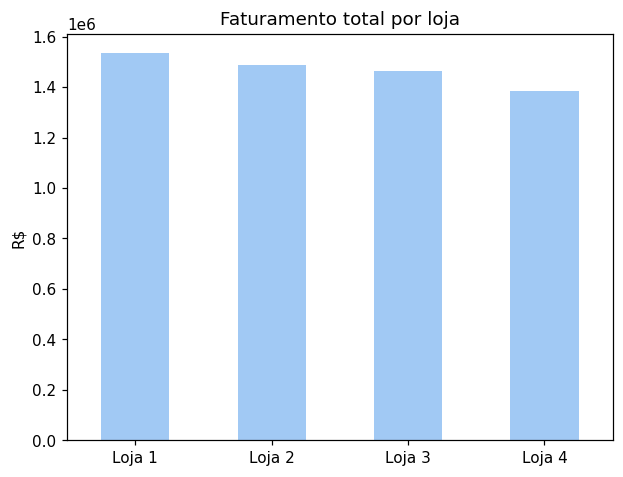

In [5]:
# 1. Carregar dados
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}
lojas = {nome: pd.read_csv(link) for nome, link in urls.items()}

# Faturamento = soma do Preço (1 unidade por registro)
fat = {n: df["Preço"].sum() for n, df in lojas.items()}
fat_series = pd.Series(fat, name="Faturamento Total (R$)")
display(fat_series)

plt.figure()
fat_series.plot(kind="bar")
plt.title("Faturamento total por loja")
plt.ylabel("R$"); plt.xticks(rotation=0)
plt.show()


# 2. Vendas por Categoria


,Categoria Mais Popular
Loja 1,moveis
Loja 2,moveis
Loja 3,moveis
Loja 4,moveis


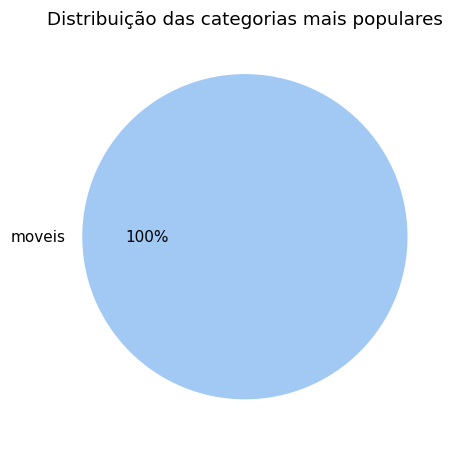

In [6]:
cat_pop = {n: df["Categoria do Produto"].value_counts().idxmax() for n, df in lojas.items()}
cat_series = pd.Series(cat_pop, name="Categoria Mais Popular")
display(cat_series)

plt.figure()
cat_series.value_counts().plot(kind="pie", autopct="%1.0f%%")
plt.title("Distribuição das categorias mais populares")
plt.ylabel("")
plt.show()


# 3. Média de Avaliação das Lojas

,Avaliação Média
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


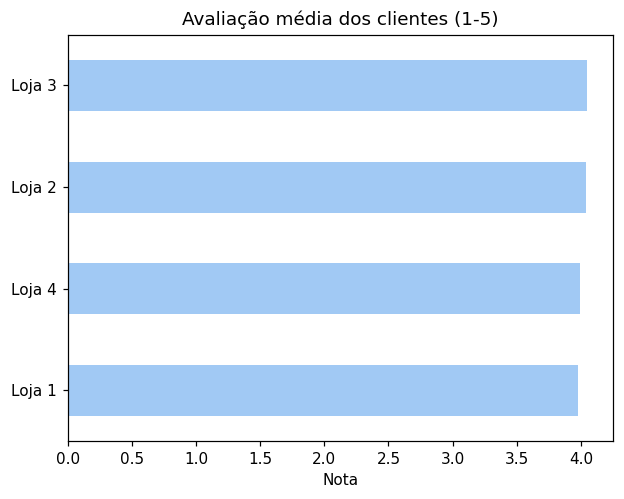

In [7]:
aval = {n: df["Avaliação da compra"].mean() for n, df in lojas.items()}
aval_series = pd.Series(aval, name="Avaliação Média")
display(aval_series.round(2))

plt.figure()
aval_series.sort_values().plot(kind="barh")
plt.title("Avaliação média dos clientes (1-5)")
plt.xlabel("Nota")
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [8]:
mais_menos = {}
for n, df in lojas.items():
    prod_counts = df["Produto"].value_counts()
    mais_menos[n] = {
        "Produto + vendido": prod_counts.idxmax(),
        "Qtd +": int(prod_counts.max()),
        "Produto - vendido": prod_counts.idxmin(),
        "Qtd -": int(prod_counts.min()),
    }
prod_df = pd.DataFrame(mais_menos).T
display(prod_df)


,Produto + vendido,Qtd +,Produto - vendido,Qtd -
Loja 1,Micro-ondas,60,Headset,33
Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
Loja 3,Kit banquetas,57,Blocos de montar,35
Loja 4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja


,Frete Médio (R$)
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


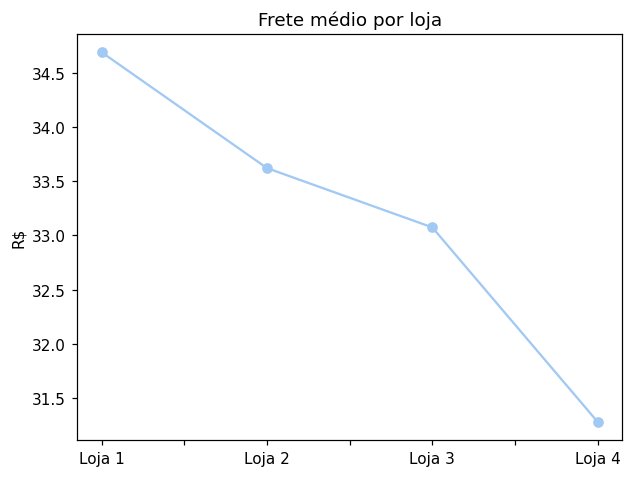

In [9]:
frete = {n: df["Frete"].mean() for n, df in lojas.items()}
frete_series = pd.Series(frete, name="Frete Médio (R$)")
display(frete_series.round(2))

plt.figure()
frete_series.plot(marker="o")
plt.title("Frete médio por loja")
plt.ylabel("R$"); plt.xticks(rotation=0)
plt.show()


## Score global

In [10]:
metricas = pd.DataFrame({
    "Faturamento": fat_series,
    "Avaliação": aval_series,
    "Frete Médio": frete_series,
})

up   = ["Faturamento", "Avaliação"]  # maior é melhor
down = ["Frete Médio"]               # menor é melhor

scaler = MinMaxScaler()
metricas_norm = metricas.copy()
metricas_norm[up]   = scaler.fit_transform(metricas[up])
metricas_norm[down] = 1 - scaler.fit_transform(metricas[down])
metricas_norm["Score"] = metricas_norm.mean(axis=1)

metricas_norm_sorted = metricas_norm.sort_values("Score")
display(metricas_norm_sorted)

loja_pior = metricas_norm_sorted.index[0]
print(f"✅ Loja recomendada para venda → {loja_pior}")


,Faturamento,Avaliação,Frete Médio,Score
Loja 1,1.000000,0.000000,0.000000,0.333333
Loja 4,0.000000,0.266247,1.000000,0.422082
Loja 2,0.693023,0.846154,0.313485,0.617554
Loja 3,0.530142,1.000000,0.473903,0.668015


✅ Loja recomendada para venda → Loja 1


## Relatorio

# 📊 Relatório de Análise — Desafio **Alura Store**
**Autor:** Bruno • Especialização em Data Science  


---

## 1 │ Contexto & Objetivo
O Sr. João possui quatro lojas no e-commerce **Alura Store** e deseja vender a unidade de pior desempenho para financiar um novo negócio.  
Foram avaliadas cinco métricas-chave e agregadas em um **Score Global** (0 = pior, 1 = melhor).

- **Faturamento Total**  
- **Categoria Mais Popular**  
- **Avaliação Média dos Clientes**  
- **Produtos + e – vendidos**  
- **Frete Médio**  

---

<h3>2 │ Painel Consolidado</h3>

<table>
  <thead>
    <tr>
      <th>Loja</th>
      <th>Faturamento (R$)</th>
      <th>Avaliação&nbsp;Média</th>
      <th>Frete&nbsp;Médio (R$)</th>
      <th>Score</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>1</td><td>1 534 509,12</td><td>3,98</td><td>34,69</td><td>0,33 ⬇️</td></tr>
    <tr><td>4</td><td>1 384 497,58</td><td>4,00</td><td>31,28</td><td>0,42</td></tr>
    <tr><td>2</td><td>1 488 459,06</td><td>4,04</td><td>33,62</td><td>0,62</td></tr>
    <tr><td>3</td><td>1 464 025,03</td><td>4,05</td><td>33,07</td><td>0,67</td></tr>
  </tbody>
</table>

<blockquote><strong>🔎 Insight-chave:</strong> embora seja a campeã em faturamento bruto, <strong>Loja 1</strong> tem o pior Score devido ao frete mais alto e à menor satisfação dos clientes.</blockquote>


---

## 3 │ Métricas em Detalhe

### 3.1 Faturamento  
*Loja 1 lidera (+3 % sobre a média), porém não converte em vantagem competitiva.*

### 3.2 Categoria mais popular  
Todas as unidades têm **móveis** como carro-chefe → diferenciação inexistente.

### 3.3 Avaliação média  
Loja 1 registra **3,98/5** ⇒ 1,7 % abaixo das demais (média 4,05).

### 3.4 Produtos + e – vendidos  

| Loja | Produto + vendido (unid.) | Produto – vendido (unid.) |
|------|---------------------------|---------------------------|
| 1 | Micro-ondas (60) | Headset (33) |
| 2 | Iniciando em programação (65) | Jogo de tabuleiro (32) |
| 3 | Kit banquetas (57) | Blocos de montar (35) |
| 4 | Cama box (62) | Guitarra (33) |

*Best-seller da Loja 1 vende **8 %** menos que o campeão da Loja 2.*

### 3.5 Frete médio  
Loja 1 cobra **R$ 34,69** (↑ 10 % vs. média das outras).

---

## 4 │ Riscos & Oportunidades

| Aspecto | Loja 1 (venda) | Demais Lojas (manter) |
|---------|----------------|-----------------------|
| **Custo logístico** | Alto (frete ↑) | Médio |
| **Reputação** | Avaliação < 4 ★ | Avaliação ≥ 4 ★ |
| **Potencial de sinergia** | Baixo | Moderado |
| **Liquidez de venda** | Alta (maior faturamento atrai compradores) | — |

---

## 5 │ Conclusão & Recomendação
🔔 **Recomenda-se vender a Loja 1**.  
Motivos principais:

1. **Frete 10 % mais caro**, impacto direto na conversão.  
2. **Avaliação mais baixa**, sugerindo problemas de experiência do cliente.  
3. **Mix de produtos pouco eficiente**, best-seller inferior à concorrência interna.  
4. Apesar do maior faturamento, o **Score Global 0,33** evidencia fragilidades operacionais que reduzem margem e valor futuro.

---

## 6 │ Próximos Passos — Roteiro de Execução

| Etapa                            | Responsável              | Prazo-alvo |
|---------------------------------|--------------------------|-----------:|
| **Due-diligence contábil e jurídica** da Loja 1 | Financeiro & Jurídico | 30 dias |
| **Definir valuation** e faixa de preço | CFO | 45 dias |
| **Prospectar compradores** estratégicos e conduzir negociação | Comercial | 60 dias |
| **Planejar o reinvestimento** do capital obtido | Diretoria | 75 dias |

> 🔧 **Observação:** prazos podem ser ajustados conforme ritmo das negociações. Esta agenda serve como ponto de partida para acelerar a venda e realocar recursos com agilidade.


> 📌 **Observação Técnica:** gráficos de faturamento, avaliação e frete foram gerados no notebook e encontram-se logo acima desta seção para referência visual.

---

**Elaborado por Bruno**  
Programa ONE — Especialização em Data Science
